## Ensemble Model: Stacking

In [52]:
# Import necessary libraries
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

### Data Preparation

In [53]:
df = pickle.load(open('../common/df.p', 'rb'))

# Split data into train and test sets 80:20
train_size = int(len(df) * 0.8)
train_cpu, test_cpu = df['cpu_usage'].iloc[:train_size], df['cpu_usage'].iloc[train_size:]

### Models Creation Functions & Utilities

In [54]:
def auto_select_arima(X):
    model = auto_arima(X, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True, stepwise=True)
    return model

In [55]:
def train_arima(series, order=(1,1,1)):
    """
    Train an ARIMA model on a given time series.
    
    Parameters:
    - series: Pandas Series object representing the time series data.
    - order: A tuple representing the (p,d,q) parameters for ARIMA.
    
    Returns:
    - model_fit: The trained ARIMA model.
    """
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

### Models Creation

In [62]:
cpu_auto_arima = auto_select_arima(train_cpu)
print(cpu_auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-4355.617, Time=0.97 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-624.316, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3952.626, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2041.362, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-4356.828, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-2656.421, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4328.369, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-4355.161, Time=0.56 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-3050.828, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4354.762, Time=1.09 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-4354.080, Time=1.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4375.347, Time=1.54 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3729.909, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4354.030, Time=1.00 sec
 ARIMA(2,0,2)(0,0,0)

In [57]:
cpu_arima_model = train_arima(train_cpu, (1,0,2))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)


### Models Prediction

In [60]:
### ARIMA - CPU Usage

cpu_arima_forecast = cpu_arima_model.forecast(steps=len(test_cpu))

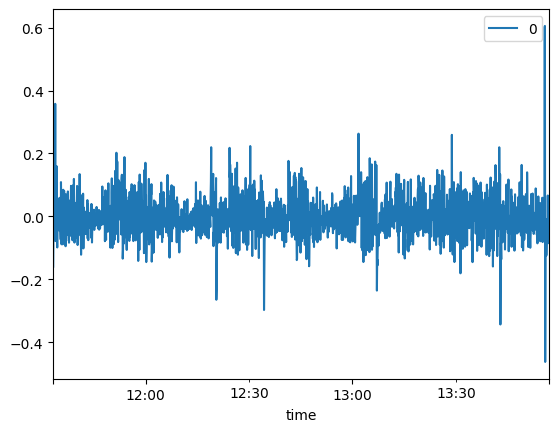

In [61]:
residuals = pd.DataFrame(cpu_arima_model.resid)
residuals.plot()
plt.show()

### Visualization

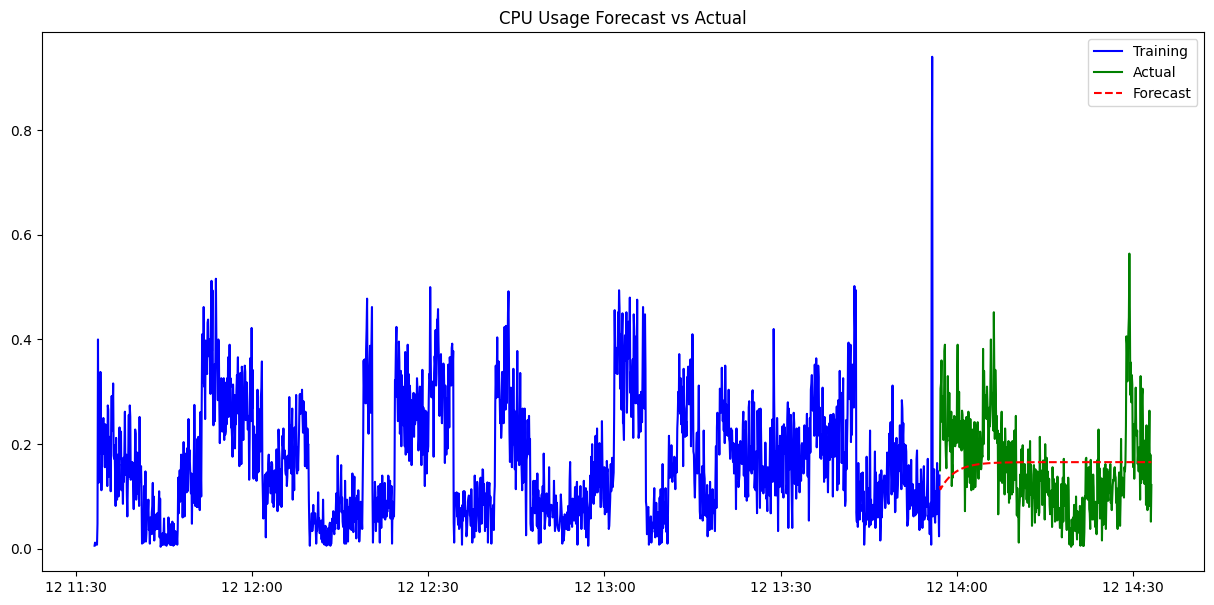

In [59]:
### ARIMA - CPU Usage

plt.figure(figsize=(15,7))

# Plotting training data
plt.plot(train_cpu.index, train_cpu, label='Training', color='blue')

# Plotting actual test data
plt.plot(test_cpu.index, test_cpu, label='Actual', color='green')

# Plotting forecast
plt.plot(test_cpu.index, cpu_arima_forecast, label='Forecast', color='red', linestyle='--')

plt.title('CPU Usage Forecast vs Actual')
plt.legend()
plt.show()